/tmp/ipykernel_2123428/1657970991.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['HGB', 'SVC', 'LogReg', 'RF'])


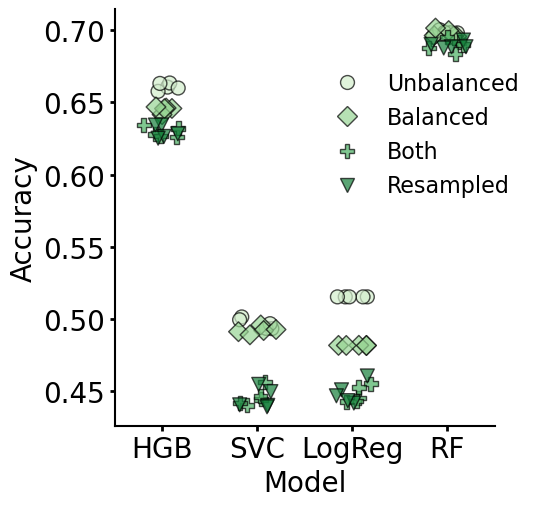

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
test_summary = pd.read_csv('fig4b.csv')

# Add columns for balanced and resampled flags
test_summary['balanced'] = test_summary.model.str.contains('Balanced')
test_summary['resampled'] = test_summary.model.str.contains('Resampled')
test_summary = test_summary.reset_index(drop=True)

# Create sampling labels
label_names = []
for i in range(len(test_summary)):
    if test_summary['balanced'][i] == False and test_summary['resampled'][i] == False:
        label_names.append('Unbalanced')
    elif test_summary['balanced'][i] == True and test_summary['resampled'][i] == False:
        label_names.append('Balanced')
    elif test_summary['balanced'][i] == False and test_summary['resampled'][i] == True:
        label_names.append('Resampled')
    else:
        label_names.append('Both')
test_summary['sampling_label'] = label_names

# Extract model type from model name
test_summary['model_type'] = test_summary.model.str.split('_').str[0]

# Create plot
fig, ax = plt.subplots(figsize=(4.9, 5.41))

# Plot data points with different markers for each sampling type
order = ['Unbalanced', 'Balanced', 'Both','Resampled']
markers = ['o','D', 'P', 'v']
for o, m in zip(order, markers):
    t = test_summary.loc[test_summary.sampling_label == o]
    stripplot = sns.stripplot(data=t, x='model_type', y='overall_accuracy', hue='sampling_label',
                jitter=0.2, alpha=0.7, palette='Greens', marker=m, s=10, edgecolor='black', linewidth=1, hue_order=order)

# Customize legend
legend = ax.legend(fontsize=16, alignment='left', bbox_to_anchor=(0.5, 0.5))
new_handles = [legend.legend_handles[0], legend.legend_handles[5], legend.legend_handles[10], legend.legend_handles[-1]]
legend = ax.legend(handles=new_handles, labels = order, fontsize=16, alignment='left', bbox_to_anchor=(0.5, 0.5))
legend.get_frame().set_facecolor('none')
legend.get_frame().set_linewidth(0.0)

# Customize plot appearance
ax.set_xticklabels(['HGB', 'SVC', 'LogReg', 'RF'])
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_xlabel('Model', fontsize=20)
ax.xaxis.set_tick_params(width=2, labelsize=20)
ax.yaxis.set_tick_params(width=2, labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)